In [1]:
import numpy as np
import syndat
import pandas as pd
import os
from matplotlib.pyplot import *
# import ATARI
from ATARI import PiTFAll as pf
import h5py
h5py.enable_ipython_completer()


In [2]:
%matplotlib widget

In [3]:
# Peformance Test for Fitting ALgorithm (PiTFALl)
# pd.__version__

In [4]:
# Initialize particle pair and quantup spin groups of interest

ac = 0.81271    # scattering radius in 1e-12 cm 
M = 180.948030  # amu of target nucleus
m = 1           # amu of incident neutron
I = 3.5         # intrinsic spin, positive parity
i = 0.5         # intrinsic spin, positive parity [sic: perhaps, angular momentum?]
l_max = 1       # highest order l-wave to consider

spin_groups = [ (3.0,1,0) ] # (4.0,1,0) 
average_parameters = pd.DataFrame({ 'dE'    :   {'3.0':8.79, '4.0':4.99},
                                    'Gg'    :   {'3.0':46.4, '4.0':35.5},
                                    'gn2'    :   {'3.0':64.0, '4.0':64.0}  })

Ta_pair = syndat.particle_pair( ac, M, m, I, i, l_max,
                                spin_groups=spin_groups, average_parameters=average_parameters,
                                input_options={})


In [5]:

# initialize experimental setup
E_min_max = [100, 120]
input_options = { 'Add Noise': True,
            'Sample TURP':True,
            'Sample TOCS':True, 
            'Calculate Covariance': True,
            'Compression Points':[],
            'Grouping Factors':None}

experiment_parameters = {'bw': {'val':0.02,    'unc'   :   0}}

exp = syndat.experiment(E_min_max, 
                        input_options=input_options, 
                        experiment_parameters=experiment_parameters)
len(exp.energy_domain)

1109

In [6]:
# run a performance test with the PiTFAll module

# case_file = './perf_test_baron'
case_file = '/Users/noahwalton/Documents/GitHub/ATARI/Fitting/perf_test_baron.hdf5'
# case_file = './test.hdf5'

dataset_range = (0, 11)

# case_file = './perf_test_baron_rev2.hdf5'
# number_of_datasets = 27

path_to_application_exe = '/Applications/MATLAB_R2021b.app/bin/matlab'
path_to_fitting_script = "/Users/noahwalton/Documents/GitHub/ATARI/baron_fit_rev1.m"

# full_Ta181_RRR_JEFF = (4,2546)

vary_Erange = {'fullrange':(750,2546), 'maxres':5 , 'prob':0.001}

input_options = {   'Overwrite Syndats'    :   False, 
                    'Overwrite Fits'       :   False,
                    'Use HDF5'             :   True,
                    'Vary Erange'          :   vary_Erange} 



perf_test = pf.performance_test(dataset_range,
                                case_file,
                                input_options=input_options)

sample_data_df, out = perf_test.generate_syndats(Ta_pair, exp, 
                                                    solver='syndat_SLBW')
print(out)

User chose to NOT overwrite previously generated datasets in the file /Users/noahwalton/Documents/GitHub/ATARI/Fitting/perf_test_baron.hdf5.
Samples  0-11 already existed.
Samples 11-11 were generated.
If Syndat generation settings were changed these files should be overwriten.


In [7]:
# test = pd.DataFrame({'one':1,'two':2}, index=range(4,6))
# test
# np.count_nonzero(sample_data_df.NumRes.values>5)
# sample_data_df

In [8]:
# test accessing generated data
# sample_0 = pd.read_hdf(case_file, 'sample_0/syndat_par')
# sample_data_df = pd.read_hdf(case_file, 'test_stats/sample_data'


print(f"Average # Resonances: {np.mean(sample_data_df.NumRes)}")
print(f"Min/Max # Resonances: {np.min(sample_data_df.NumRes)}/{np.max(sample_data_df.NumRes)}")

print(f"Average Energy Points: {np.mean(sample_data_df.NumEpts)}")
print(f"Min/Max Energy Points: {np.min(sample_data_df.NumEpts)}/{np.max(sample_data_df.NumEpts)}")

print(f"Min theoretical SE: {np.min(sample_data_df.theo_exp_SE)}")

# sample_0

Average # Resonances: 3.0
Min/Max # Resonances: 2/4
Average Energy Points: 28.818181818181817
Min/Max Energy Points: 16/47
Min theoretical SE: 0.03537038593332749


In [9]:
out = perf_test.generate_fits(False)
print(out)

User chose to NOT run the fitting algorithm locally.
The data file /Users/noahwalton/Documents/GitHub/ATARI/Fitting/perf_test_baron.hdf5 has been prepared based on the selected overwrite options.
Please run samples 0-11


In [10]:
# f = h5py.File(case_file, 'r+')
# # del f['sample_0']['fit_par']
# # print(f['sample_0/est_par_baron'])
# # print(f['sample_10/exp_cov'][()])
# print(f['sample_0'].keys())
# # print(f['test_stats/sample_data'].keys())
# f.close()
# # pd.read_hdf(case_file, 'sample_0/exp_pw')
# # pd.read_hdf(case_file, 'sample_0/theo_par')

In [11]:
integral_FoMs, sample_data, printout = perf_test.analyze(Ta_pair, exp, 'baron')
# pd.read_hdf(case_file, 'integral_FoMs')

print(printout)

The mean/std of the fit to experimental chi2/dof is 4.0752850314874934e-05 +/- 7.367098973998991e-05 in transmission space.
The mean/std of the fit to theorectical MSE is 8382.444560821265 +/- 12580.87341259866 in cross section space.


In [12]:
integral_FoMs

,fit_theo_MSE,fit_exp_SE,fit_exp_chi2,fit_exp_chi2dof,theo_exp_SE,theo_exp_chi2,theo_exp_chi2dof
0,44184.337143,2.071148,0.012408,0.000270,0.163063,0.000928,0.000020
1,2699.716630,0.049546,0.000154,0.000007,0.043518,0.000129,0.000006
2,1682.790524,0.103314,0.000356,0.000012,0.104181,0.000387,0.000013
3,2181.544203,0.654655,0.000192,0.000010,0.049216,0.000200,0.000010
4,881.851987,0.073986,0.000229,0.000008,0.074506,0.000233,0.000008
5,3579.687371,0.031154,0.000093,0.000006,0.035370,0.000108,0.000007
6,742.903504,0.121986,0.000783,0.000022,0.112117,0.000614,0.000018
7,2860.573315,0.048477,0.000188,0.000007,0.078447,0.000252,0.000009
8,13984.330939,0.152445,0.001384,0.000053,0.200285,0.002057,0.000079
9,1320.053456,0.087795,0.000389,0.000026,0.075140,0.000389,0.000026


In [13]:
# figure()
# scatter(integral_FoMs.fit_theo_MSE, sample_data.NumRes, marker='.', s=35)
# ylim([-0.1,np.max(sample_data_df.NumRes)+1])
# xlim([0-np.max(integral_FoMs.fit_theo_MSE)/3,np.max(integral_FoMs.fit_theo_MSE)*1.1])

# figure()
# bins = hist(integral_FoMs.fit_theo_MSE, bins=20)

# pw_data, syndat_par_df, fit_par_df = pf.read_sample_case_data(case_file, 96)
# print(fit_par_df)
# figure()
# plot(pw_data.E, pw_data.est_trans)

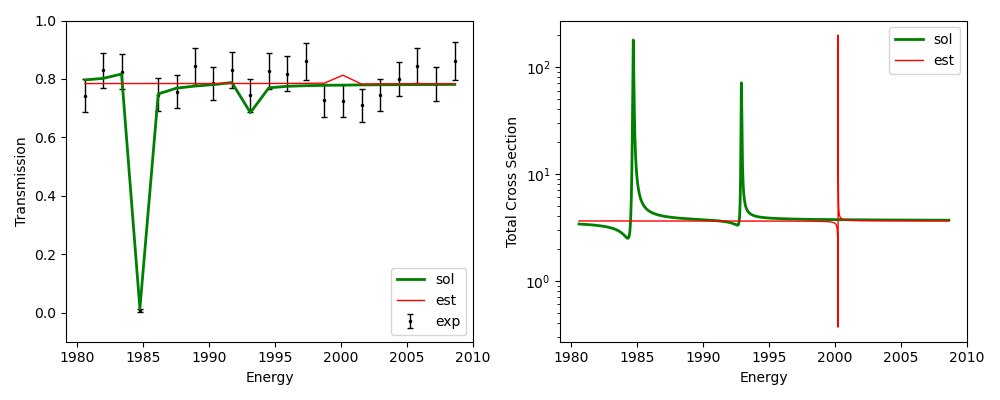

In [19]:
fig = pf.sample_case.plot(case_file, 3, 'baron')

In [15]:
exp_pw_df, theo_pw_df, theo_par_df, est_par_df, exp_cov = pf.sample_case.read_sample_case_data(case_file, 0, 'baron')
exp_pw_df
# xs_tot_syndat, xs_tot_fit, new_egrid = pf.sample_case.calculate_xs(pw_data.E, Ta_pair, syndat_par_df, fit_par_df, True)

# n = exp.redpar.val.n  # atoms per barn or atoms/(1e-12*cm^2)
# trans_fit = np.exp(-n*xs_tot_fit)
# trans_syndat = np.exp(-n*xs_tot_syndat)

# from scipy import integrate
# est_sol_SE = integrate.trapezoid((xs_tot_syndat-xs_tot_fit)**2, new_egrid)
# print(est_sol_SE)

# print(syndat_par_df)
# print(fit_par_df)

# fig, ax = subplots(1,2, figsize=(10,4))
# ax[0].plot(new_egrid, xs_tot_fit)
# ax[0].plot(new_egrid, xs_tot_syndat)
# ax[0].set_yscale('log')

# ax[1].plot(new_egrid, trans_fit, 'r')
# ax[1].plot(new_egrid, trans_syndat, 'g')

,E,theo_trans,exp_trans,est_trans_baron
0,1194.000825,0.666137,0.647890,0.616628
1,1193.352333,0.212504,0.211666,0.205452
2,1192.704368,0.845677,0.872803,0.539926
3,1192.056931,0.833542,0.789192,0.738103
4,1191.410022,0.817598,0.911857,0.724468
5,1190.763638,0.808371,0.930517,0.508826
6,1190.117781,0.802351,0.832103,0.727531
7,1189.472449,0.797961,0.782645,0.759000
8,1188.827641,0.794408,0.917614,0.753189
9,1188.183358,0.791186,0.812959,0.745682
